In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from env import host, user, password
import acquire
import prepare

from sklearn.model_selection import train_test_split

import sklearn.preprocessing

sql_query = '''select *
from properties_2017
join predictions_2017 using(parcelid)
where propertylandusetypeid = 260
or 261 or 263 or 273 or 274 or 276 or 279
and unitcnt = 1
and transactiondate 
like '2017-05-%%' 
or '2017-06-%%';
    '''
connection = f'mysql+pymysql://{user}:{password}@{host}/zillow'
df = pd.read_sql(sql_query, connection)

In [2]:
df = acquire.acquire_zillow()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77614 entries, 0 to 77613
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77614 non-null  int64  
 1   id                            77614 non-null  int64  
 2   airconditioningtypeid         25007 non-null  float64
 3   architecturalstyletypeid      207 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77580 non-null  float64
 6   bedroomcnt                    77580 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49810 non-null  float64
 9   calculatedbathnbr             76964 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6037 non-null   float64
 12  calculatedfinishedsquarefeet  77379 non-null  float64
 13  f

In [4]:
df.sample(5)

,parcelid,id,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,id,logerror,transactiondate
59430,12072948,2004698,1.0,NaN,NaN,3.0,3.0,NaN,7.0,3.0,...,98534.0,2016.0,38085.0,1136.39,None,NaN,6.037301e+13,59430,-0.044378,2017-07-21
5333,17124249,1387510,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,...,107883.0,2016.0,43150.0,1210.74,None,NaN,6.111005e+13,5333,0.026746,2017-01-25
13647,13991274,2128813,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,73363.0,2016.0,36574.0,1213.04,None,NaN,6.059088e+13,13647,-0.024633,2017-03-01
28900,17186714,1193841,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,55536.0,2016.0,14012.0,607.26,None,NaN,6.111005e+13,28900,0.003686,2017-04-21
10318,12213620,632997,NaN,NaN,NaN,2.0,4.0,NaN,4.0,2.0,...,271309.0,2016.0,176040.0,4106.18,None,NaN,6.037535e+13,10318,-0.038592,2017-02-16


In [5]:
# split the data
train, test = train_test_split(df, test_size=.2, random_state=1234)
train, validate = train_test_split(train, test_size=.3, random_state=1234)

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

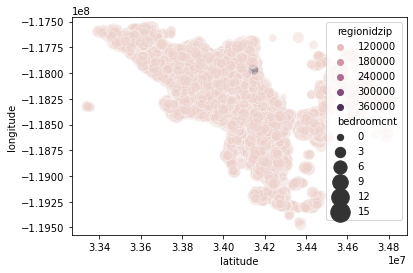

In [6]:
sns.scatterplot(data=train, x="latitude", y="longitude", 
                hue="regionidzip", size="bedroomcnt", 
                sizes = (40,400), alpha=.4)

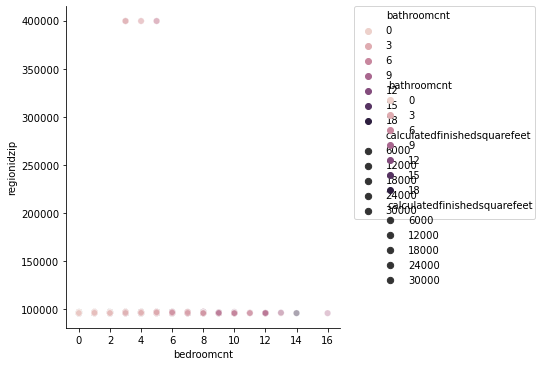

In [7]:
sns.relplot(data=train, x="bedroomcnt", y="regionidzip", 
                hue="bathroomcnt", size="calculatedfinishedsquarefeet", 
                sizes = (40,40), alpha=.4)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

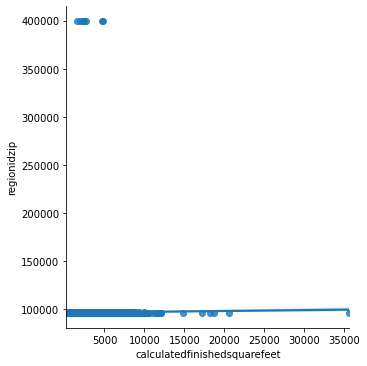

In [8]:
sns.lmplot(x="calculatedfinishedsquarefeet", y="regionidzip", data=train);

In [ ]:
sns.swarmplot(x="calculatedfinishedsquarefeet",y="taxamount",
              hue='regionidzip',data=train,palette="rainbow")